In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
front_2Dcoord = np.load('front_image.npy', allow_pickle=True)
back_2Dcoord = np.load('back_image.npy', allow_pickle=True)
front_img = cv2.imread('front.png')

(12, 2) (12, 2)


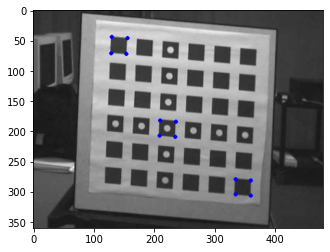

In [3]:
#visualization
print(front_2Dcoord.shape, back_2Dcoord.shape)
from copy import deepcopy
vis_img = deepcopy(front_img)
for i in range(front_2Dcoord.shape[0]):
    cv2.circle(vis_img, (int(front_2Dcoord[i,0]), int(front_2Dcoord[i,1])), 2, (255,0,0), 2)
plt.imshow(vis_img[:,:,::-1])
plt.show()

In [5]:
print(front_2Dcoord)
print(back_2Dcoord)

[[130.207   44.2962]
 [156.3471  46.5892]
 [154.9713  72.7293]
 [129.2898  71.3535]
 [210.4618 182.3344]
 [236.1433 184.1688]
 [235.6847 209.8503]
 [209.086  207.0987]
 [335.6592 279.5573]
 [360.4236 281.3917]
 [360.8822 306.1561]
 [335.2006 304.3217]]
[[148.551   29.621 ]
 [174.2325  31.4554]
 [173.3153  57.1369]
 [147.1752  55.3025]
 [228.8057 166.742 ]
 [253.5701 168.1178]
 [253.5701 194.258 ]
 [227.4299 192.4236]
 [353.5446 263.965 ]
 [379.6847 265.7994]
 [378.7675 291.0223]
 [352.6274 289.1879]]


In [8]:
# ------------TODO----------------
# Compute corresponding 3D coordinate
# ------------TODO----------------
front_3Dcoord = np.zeros((12, 3))
back_3Dcoord = np.zeros((12, 3))

front_3Dcoord[0] = np.array([0, 0, 0])
front_3Dcoord[1] = np.array([50, 0, 0])
front_3Dcoord[2] = np.array([50, 50, 0])
front_3Dcoord[3] = np.array([0, 50, 0])

for i in range(4):
    front_3Dcoord[i+4] = front_3Dcoord[i]+[160,240,0]

for i in range(4):
    front_3Dcoord[i+8] = front_3Dcoord[i+4]+[240,160,0]

back_3Dcoord = front_3Dcoord + [0,0,150]

all_2Dcoord = np.concatenate((front_2Dcoord, back_2Dcoord), axis=0)
all_3Dcoord = np.concatenate((front_3Dcoord, back_3Dcoord), axis=0)
print(all_2Dcoord.shape, all_3Dcoord.shape)

(24, 2) (24, 3)


In [39]:
# ------------TODO----------------
# Construct the Equation Pm=0 and solve m
# ------------TODO----------------

P = np.zeros((48, 12))
m = np.zeros((12, 1))

all_3D = np.ones((24,4))
all_3D[:,:3] = all_3Dcoord

# 构造P矩阵
for i in range(24):
    P[2*i,0:4] = all_3D[i]
    P[2*i,4:8] = 0
    P[2*i,8:16] = -all_2Dcoord[i,0]*all_3D[i]

    P[2*i+1,0:4] = 0
    P[2*i+1,4:8] = all_3D[i]
    P[2*i+1,8:16] = -all_2Dcoord[i,1]*all_3D[i]
print("P:")
print(P)
# 对P进行奇异值
U, D, V_T = np.linalg.svd(P)
# last column of V gives m
V = V_T.T
m = V[:,-1]
m = m.reshape(3,4)
print("m:")
print(m)

P:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.30207000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.42962000e+01]
 [ 5.00000000e+01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -7.81735500e+03 -0.00000000e+00 -0.00000000e+00 -1.56347100e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.00000000e+01  0.00000000e+00  0.00000000e+00  1.00000000e+00
  -2.32946000e+03 -0.00000000e+00 -0.00000000e+00 -4.65892000e+01]
 [ 5.00000000e+01  5.00000000e+01  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -7.74856500e+03 -7.74856500e+03 -0.00000000e+00 -1.54971300e+02]
 [

In [40]:
# ------------TODO----------------
# Solve K, and [R T] from m
# ------------TODO----------------

K = np.zeros((3, 3))
R = np.zeros((3, 3))
T = np.zeros((3, 1))

A_hat = m[:,:3]
b_hat = m[:,3]
a1 = A_hat[0]
a2 = A_hat[1]
a3 = A_hat[2]

rho = 1/np.sqrt(np.sum(np.square(a3)))
cx = rho*rho*a1@a3.T
cy = rho*rho*a2@a3.T

cos = np.dot(np.cross(a2,a3),np.cross(a3,a1))/(np.linalg.norm(np.cross(a2,a3))*np.linalg.norm(np.cross(a3,a1)))
sin = np.sqrt(1-cos**2)

alpha = rho*rho*np.linalg.norm(np.cross(a1,a3))*sin
beta = rho*rho*np.linalg.norm(np.cross(a2,a3))*sin

#内参矩阵 K
K[0,0] = alpha
K[0,1] = -alpha*cos/sin
K[0,2] = cx

K[1,1] = beta/sin
K[1,2] = cy

K[2,2] = 1

print("K:")
print(K)

#外参 T
T = rho*np.linalg.inv(K)@b_hat
print("T:")
print(T)

#外参 R
r1 = np.cross(a2,a3)/np.linalg.norm(np.cross(a2,a3))
r3 = a3/np.linalg.norm(a3)
r2 = np.cross(r3,r1)
R[0] = r1
R[1] = r2
R[2] = r3
print("R:")
print(R)

K:
[[ 8.79502210e+03  2.54151912e+04 -2.45693870e+04]
 [ 0.00000000e+00  2.60097274e+04  2.61653183e+04]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
T:
[383001.83931035 -67357.8180498   67071.11347738]
R:
[[ 0.03052016  0.18542639  0.98218408]
 [ 0.76653829  0.62628989 -0.14205641]
 [-0.64147297  0.75721729 -0.12302196]]


In [17]:
# save results
save_dict = {'3Dcoord': all_3Dcoord, 'P':P, 'm':m, 'K':K, 'R':R, 'T':T}
np.save('../results/calibr', save_dict)

# The reference answer of T should be [383001.8386981  -67357.81794783  67071.11338303]
# The results are very strange because the data is fake.